In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/Driver Assistant Application(CodeFlex) 🚗 🚏👨🏻‍💻/Blind Spot Identification'

/content/drive/MyDrive/Driver Assistant Application(CodeFlex) 🚗 🚏👨🏻‍💻/Blind Spot Identification


In [4]:
train_path = '/content/drive/MyDrive/Driver Assistant Application(CodeFlex) 🚗 🚏👨🏻‍💻/Blind Spot Identification'
val_path = '/content/drive/MyDrive/Driver Assistant Application(CodeFlex) 🚗 🚏👨🏻‍💻/Blind Spot Identification'

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [6]:
val_datagen = ImageDataGenerator(rescale=1.0/255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 16 images belonging to 6 classes.


In [8]:
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 16 images belonging to 6 classes.


In [9]:
class_names = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Drains And Ditches', 'Moving Objects', 'Small Vehicles',
       'Static Objects', 'Two Wheel Vehicles', 'Long Vehicle'],
      dtype='<U18')

In [10]:
for image_batch, label_batch in train_generator:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (16, 224, 224, 3)
Label batch shape:  (16, 6)


In [11]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
base_model.trainable = False

In [13]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

In [14]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,360,838 (12.82 MB)

 Trainable params: 131,974 (515.52 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [17]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8125 - loss: 0.4294 - val_accuracy: 0.9375 - val_loss: 0.2202
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8750 - loss: 0.4271 - val_accuracy: 0.9375 - val_loss: 0.1020
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.9375 - loss: 0.1188 - val_accuracy: 1.0000 - val_loss: 0.0576
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.1037 - val_accuracy: 1.0000 - val_loss: 0.0345
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.1013 - val_accuracy: 1.0000 - val_loss: 0.0155
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0439 - val_accuracy: 1.0000 - val_loss: 0.0077
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0161 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 0.0227 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 9/20
1/1 ━

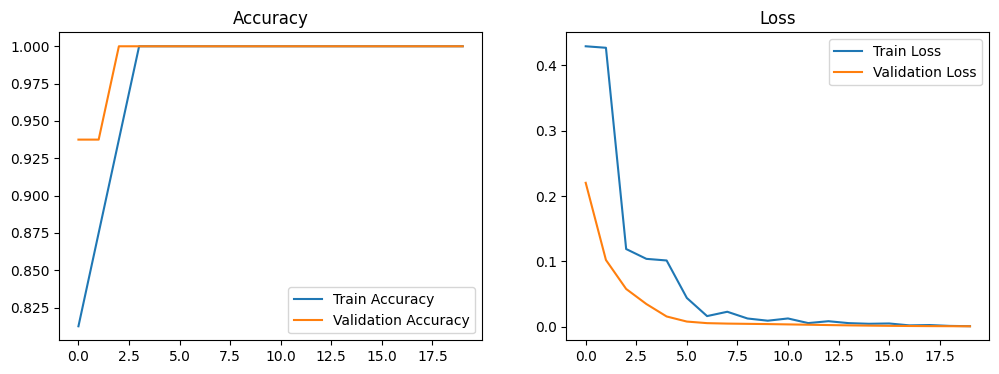

In [18]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [19]:
from tensorflow.keras.models import load_model

model.save('sample_model.h5')

In [20]:
arr = model.predict(image_batch)
predicted_id = np.argmax(arr, axis=-1)
predicted_label_batch = class_names[predicted_id]
label_id = np.argmax(label_batch, axis=-1)
true_label_batch = class_names[label_id]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


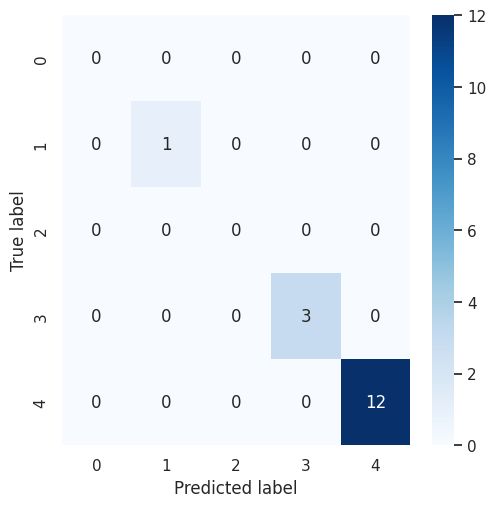

In [21]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

con_mat_df=tf.math.confusion_matrix(
    labels = label_id , predictions = predicted_id
)

figure = plt.figure(figsize=(5, 5))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(label_id, predicted_id, zero_division=0))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        12

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [23]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import tensorflow_hub as hub

In [24]:
model= tf.keras.models.load_model(
       ('sample_model.h5'),
       custom_objects={'KerasLayer':hub.KerasLayer}
)

In [26]:
img=image.load_img('/content/drive/MyDrive/Driver Assistant Application(CodeFlex) 🚗 🚏👨🏻‍💻/Blind Spot Identification/Two wheel vehicles/images (7).jpg',target_size=(224, 224))

In [27]:
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [28]:
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
class_labels = list(train_generator.class_indices.keys())
print(f"Predicted Class: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step
Predicted Class: Two wheel vehicles


In [29]:
classes=class_names

In [31]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)
    prob = prediction

    index = np.argmax(prediction)
    confidence = prob[0][index]

    if confidence >= 0.3:
        plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='orange')
        plt.imshow(img_array)
    else:
        plt.title("Not Detected", size=18, color='red')
        plt.imshow(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


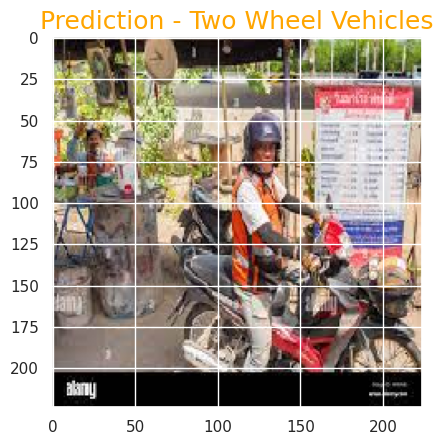

In [32]:
predict_image('/content/drive/MyDrive/Driver Assistant Application(CodeFlex) 🚗 🚏👨🏻‍💻/Blind Spot Identification/Two wheel vehicles/images (4).jpg', model)

Saving images (5) (1).jpg to images (5) (1) (1).jpg
File uploaded: images (5) (1) (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


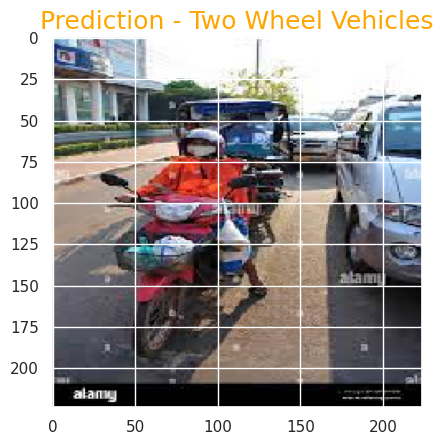

In [34]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print(f'File uploaded: {filename}')
    predict_image(filename, model)